In [22]:
import numpy as np
import pandas as pd

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

path = 'gdrive/My Drive/CSP554/Project/2015.csv'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
pip install pyspark

In [25]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [26]:
df=spark.read.csv(path, header=True, inferSchema=True)

In [27]:
df.show(5)

+-----------+--------------+--------------+---------------+--------------+------------------------+-------+------------------------+-------+-----------------------------+----------+-----------------+
|    Country|        Region|Happiness Rank|Happiness Score|Standard Error|Economy (GDP per Capita)| Family|Health (Life Expectancy)|Freedom|Trust (Government Corruption)|Generosity|Dystopia Residual|
+-----------+--------------+--------------+---------------+--------------+------------------------+-------+------------------------+-------+-----------------------------+----------+-----------------+
|Switzerland|Western Europe|             1|          7.587|       0.03411|                 1.39651|1.34951|                 0.94143|0.66557|                      0.41978|   0.29678|          2.51738|
|    Iceland|Western Europe|             2|          7.561|       0.04884|                 1.30232|1.40223|                 0.94784|0.62877|                      0.14145|    0.4363|          2.70201|


Column<'Happiness Score'>

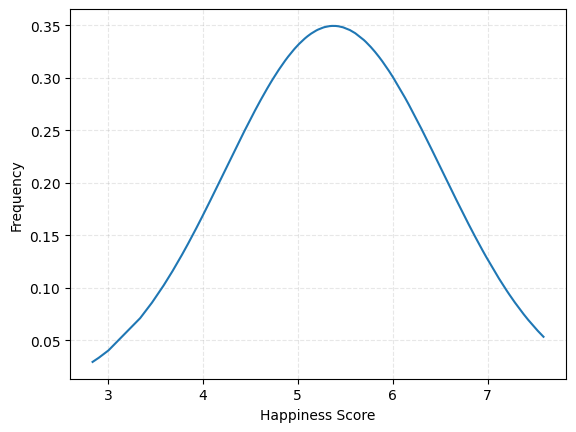

In [21]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

scores =df.rdd.map(lambda df: df["Happiness Score"]).collect()
# Calculating mean and Stdev of AGW
df_mean = np.mean(scores)
df_std = np.std(scores)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(sorted(scores), df_mean, df_std)

print("Mean happiness score:", df_mean)
print("Standard deviation of happiness score:", df_std)

# Drawing a graph
plt.plot(sorted(scores), pdf)
#plt.xlim([30,70])
plt.xlabel("Happiness Score") # , size=12)
plt.ylabel("Frequency") #, #size=12)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

Mean happiness score: 0.7085454299743231
Standard deviation of happiness score: 0.15043903171685954


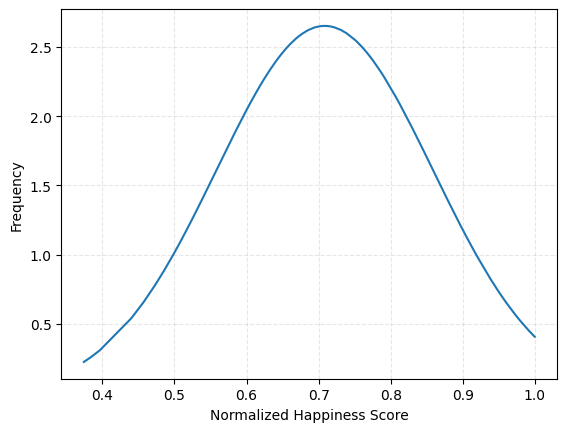

In [35]:
import sklearn
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.feature import Normalizer

v = Vectors.dense(range(3))
nor = Normalizer(1)
scores = np.array(scores)
normalized_score = scores / max(scores)

# Calculating mean and Stdev of AGW
normalized_df_mean = np.mean(normalized_score)
normalized_df_std = np.std(normalized_score)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(sorted(normalized_score), normalized_df_mean, normalized_df_std)

print("Mean happiness score:", normalized_df_mean)
print("Standard deviation of happiness score:", normalized_df_std)

# Drawing a graph
plt.plot(sorted(normalized_score), pdf)
#plt.xlim([30,70])
plt.xlabel("Normalized Happiness Score") # , size=12)
plt.ylabel("Frequency") #, #size=12)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [ ]:
from pyspark.sql.functions import col,isnan, when, count
print("Number of null values in each column:")
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

Number of null values in each column:
+-------+------+--------------+---------------+--------------+------------------------+------+------------------------+-------+-----------------------------+----------+-----------------+
|Country|Region|Happiness Rank|Happiness Score|Standard Error|Economy (GDP per Capita)|Family|Health (Life Expectancy)|Freedom|Trust (Government Corruption)|Generosity|Dystopia Residual|
+-------+------+--------------+---------------+--------------+------------------------+------+------------------------+-------+-----------------------------+----------+-----------------+
|      0|     0|             0|              0|             0|                       0|     0|                       0|      0|                            0|         0|                0|
+-------+------+--------------+---------------+--------------+------------------------+------+------------------------+-------+-----------------------------+----------+-----------------+



In [ ]:
df.summary().show()

+-------+-----------+--------------------+-----------------+------------------+--------------------+------------------------+------------------+------------------------+------------------+-----------------------------+-------------------+------------------+
|summary|    Country|              Region|   Happiness Rank|   Happiness Score|      Standard Error|Economy (GDP per Capita)|            Family|Health (Life Expectancy)|           Freedom|Trust (Government Corruption)|         Generosity| Dystopia Residual|
+-------+-----------+--------------------+-----------------+------------------+--------------------+------------------------+------------------+------------------------+------------------+-----------------------------+-------------------+------------------+
|  count|        158|                 158|              158|               158|                 158|                     158|               158|                     158|               158|                          158|        

In [ ]:
print("shape of data:", df.shape)
print("count of null value\n",df.isnull().sum())
print("\ncount of duplicated value",df.duplicated().sum())

AttributeError: ignored

In [37]:
data = pd.read_csv(path)
data.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
29,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
129,Georgia,Central and Eastern Europe,130,4.297,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541
133,Bulgaria,Central and Eastern Europe,134,4.218,0.04828,1.01216,1.10614,0.76649,0.30587,0.00872,0.11921,0.89991
26,Chile,Latin America and Caribbean,27,6.670,0.05800,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,2.67585
22,Venezuela,Latin America and Caribbean,23,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131


In [ ]:

print("shape of data\n",data.shape)
print("\ncount of null value\n",data.isnull().sum())
print("\ncount of duplicated value",data.duplicated().sum())

shape of data
 (158, 12)

count of null value
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

count of duplicated value 0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
df.describe().show()

+-------+-----------+--------------------+-----------------+------------------+--------------------+------------------------+------------------+------------------------+------------------+-----------------------------+-------------------+------------------+
|summary|    Country|              Region|   Happiness Rank|   Happiness Score|      Standard Error|Economy (GDP per Capita)|            Family|Health (Life Expectancy)|           Freedom|Trust (Government Corruption)|         Generosity| Dystopia Residual|
+-------+-----------+--------------------+-----------------+------------------+--------------------+------------------------+------------------+------------------------+------------------+-----------------------------+-------------------+------------------+
|  count|        158|                 158|              158|               158|                 158|                     158|               158|                     158|               158|                          158|        

In [ ]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.708545,0.047885,0.500549,0.706764,0.614737,0.428615,0.143422,0.237296,0.582703
std,45.754363,0.150917,0.017146,0.238474,0.194240,0.240993,0.150693,0.120034,0.126685,0.153672
min,1.000000,0.374193,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091218
25%,40.250000,0.596547,0.037268,0.322883,0.611043,0.428369,0.328330,0.061675,0.150553,0.488435
50%,79.500000,0.689667,0.043940,0.538473,0.734195,0.679546,0.435515,0.107220,0.216130,0.581714
75%,118.750000,0.822954,0.052300,0.685302,0.866053,0.791039,0.549092,0.180255,0.309883,0.683598
max,158.000000,1.000000,0.136930,1.000000,1.000000,1.000000,0.669730,0.551910,0.795880,1.000000


In [ ]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,1.000000,0.03411,0.826132,0.962403,0.918244,0.66557,0.41978,0.29678,0.698857
1,Iceland,Western Europe,2,0.996573,0.04884,0.770412,1.000000,0.924496,0.62877,0.14145,0.43630,0.750112
2,Denmark,Western Europe,3,0.992092,0.03328,0.784113,0.970297,0.853099,0.64938,0.48357,0.34139,0.691822
3,Norway,Western Europe,4,0.991433,0.03880,0.863099,0.949167,0.863409,0.66973,0.36503,0.34699,0.684401
4,Canada,North America,5,0.978911,0.03553,0.784592,0.943219,0.883326,0.63297,0.32957,0.45811,0.680640


In [ ]:
#data = df
data[col('Economy (GDP per Capita)')] = (data[col('Economy (GDP per Capita)'])) / (data['Economy (GDP per Capita)'].max())
data['Family'] = (data['Family']) / (data['Family'].max())
data['Happiness Score'] = (data['Happiness Score']) / (data['Happiness Score'].max())
data['Dystopia Residual'] = (data['Dystopia Residual']) / (data['Dystopia Residual'].max())
data['Health (Life Expectancy)'] = (data['Health (Life Expectancy)']) / (data['Health (Life Expectancy)'].max())
df.describe().show()

TypeError: ignored

In [56]:
#Data profiling : Normalization Of Data Fields

data['Economy (GDP per Capita)'] = (data['Economy (GDP per Capita)']) / (data['Economy (GDP per Capita)'].max())
data['Family'] = (data['Family']) / (data['Family'].max())
data['Happiness Score'] = (data['Happiness Score']) / (data['Happiness Score'].max())
data['Dystopia Residual'] = (data['Dystopia Residual']) / (data['Dystopia Residual'].max())
data['Health (Life Expectancy)'] = (data['Health (Life Expectancy)']) / (data['Health (Life Expectancy)'].max())
data['Freedom'] = (data['Freedom']) / (data['Freedom'].max())
#data['Trust (Government Corruption)'] = (data['Trust (Government Corruption)']) / (data['Trust (Government Corruption)'].max())
data['Generosity'] = (data['Generosity']) / (data['Generosity'].max())
data['Dystopia Residual'] = (data['Dystopia Residual']) / (data['Dystopia Residual'].max())

In [39]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.708545,0.047885,0.500549,0.706764,0.614737,0.639982,0.259865,0.298155,0.582703
std,45.754363,0.150917,0.017146,0.238474,0.194240,0.240993,0.225005,0.217488,0.159176,0.153672
min,1.000000,0.374193,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091218
25%,40.250000,0.596547,0.037268,0.322883,0.611043,0.428369,0.490242,0.111748,0.189165,0.488435
50%,79.500000,0.689667,0.043940,0.538473,0.734195,0.679546,0.650284,0.194271,0.271561,0.581714
75%,118.750000,0.822954,0.052300,0.685302,0.866053,0.791039,0.819871,0.326602,0.389358,0.683598
max,158.000000,1.000000,0.136930,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
121,Ethiopia,Sub-Saharan Africa,122,0.594701,0.03780,0.112830,0.430785,0.429700,0.43450,0.15048,0.24325,0.679807
50,Bolivia,Latin America and Caribbean,51,0.776328,0.05642,0.403054,0.697753,0.525921,0.57414,0.08800,0.20536,0.783795
76,Kyrgyzstan,Central and Eastern Europe,77,0.696718,0.03823,0.280569,0.820942,0.634850,0.43477,0.04232,0.30030,0.619826
59,Poland,Central and Eastern Europe,60,0.763279,0.04263,0.665840,0.912461,0.759844,0.53122,0.04212,0.16759,0.517928
61,Croatia,Central and Eastern Europe,62,0.759062,0.04394,0.640397,0.567838,0.768642,0.25883,0.02430,0.05444,0.764584


Exploratory Analysis : What factors contribute to the happiness score of a country?

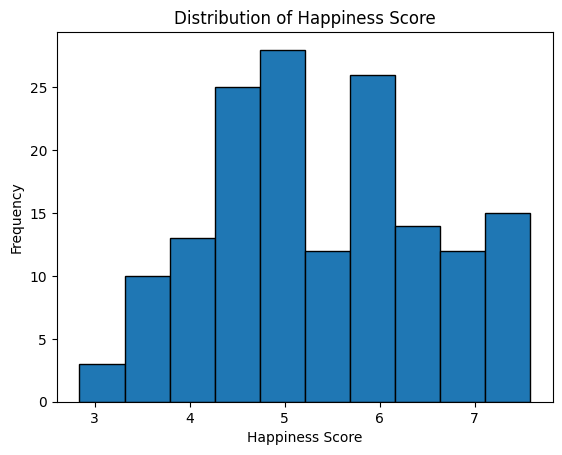

In [ ]:
import matplotlib.pyplot as plt

# Histogram of Happiness Score
plt.hist(data['Happiness Score'], bins=10, edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Score')
plt.show()

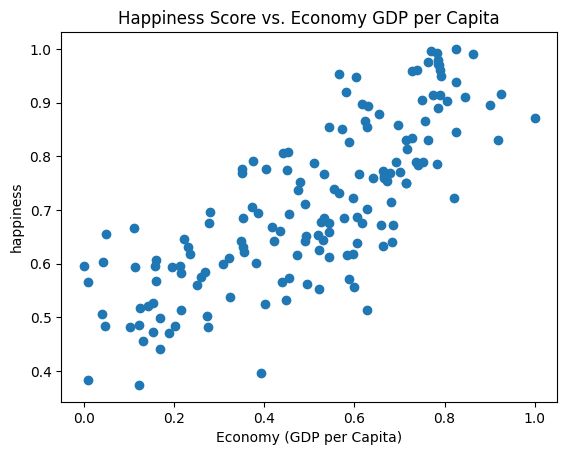

In [ ]:
# Scatter plot: Happiness Score vs. Economy GDP per Capita
plt.scatter(data['Economy (GDP per Capita)'], data['Happiness Score'])
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('happiness')
plt.title('Happiness Score vs. Economy GDP per Capita')
plt.show()

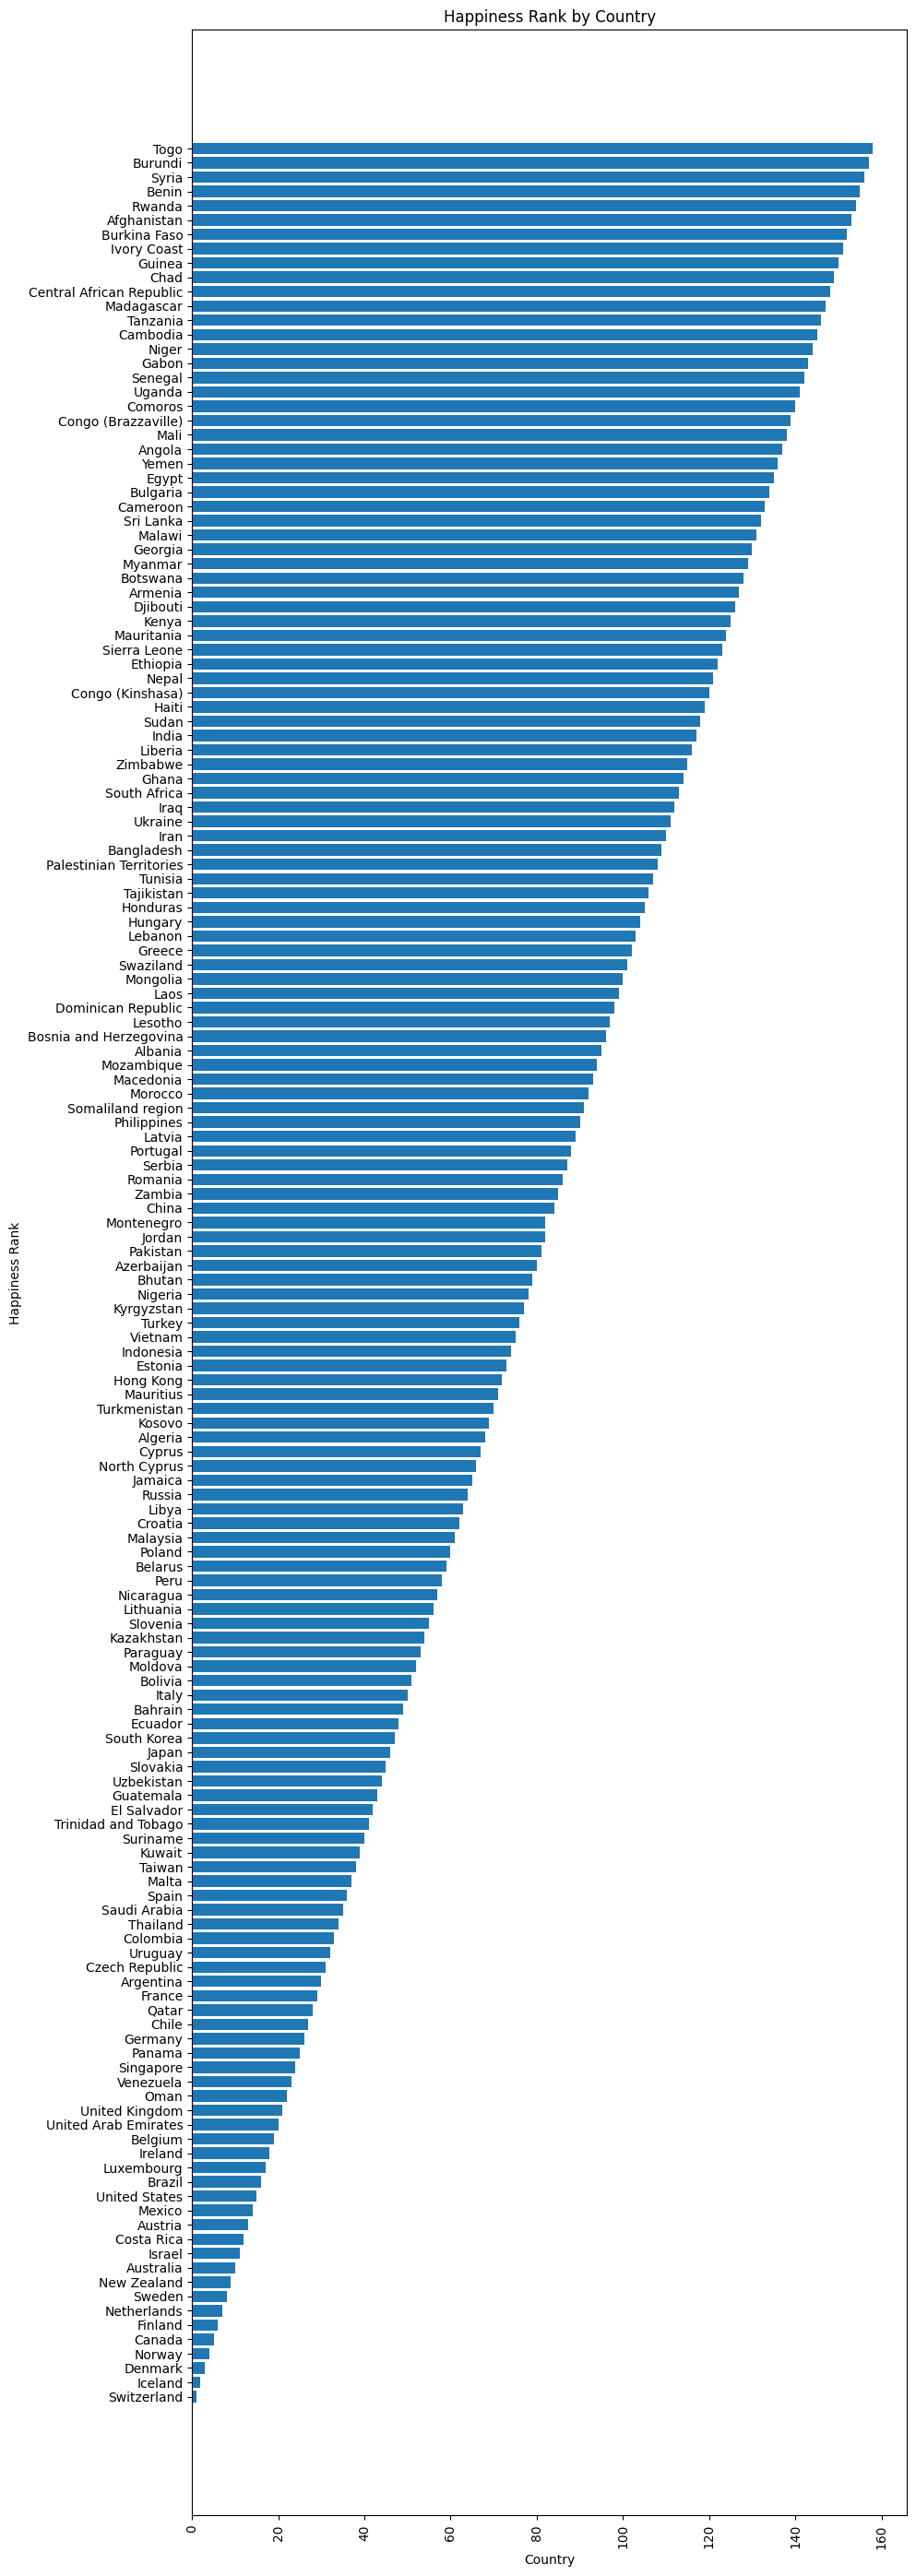

In [ ]:
# Bar chart: Happiness Rank by Country
plt.figure(figsize=(10, 35))
df_sorted = data.sort_values('Happiness Rank', ascending=True)
plt.barh(df_sorted['Country'], df_sorted['Happiness Rank'])
plt.xlabel('Country')
plt.ylabel('Happiness Rank')
plt.title('Happiness Rank by Country')
plt.xticks(rotation=90)
plt.show()

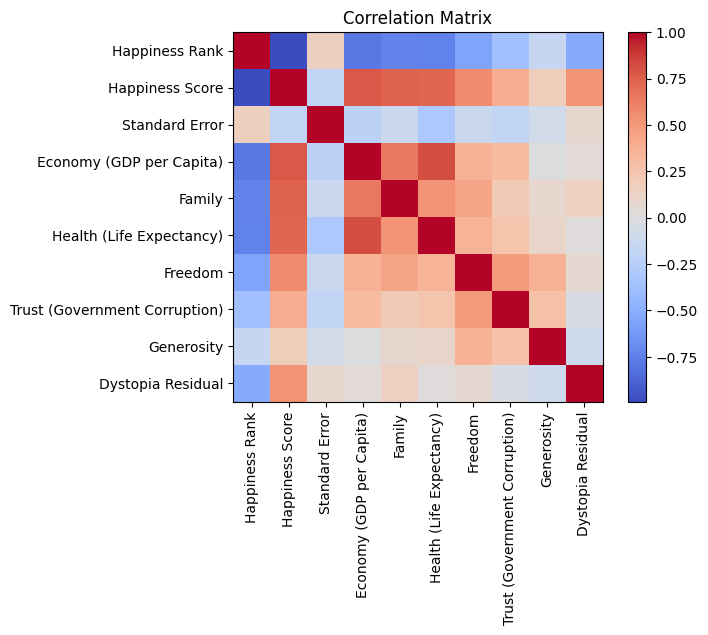

In [ ]:
# Correlation matrix
corData = data.drop(['Country', 'Region'], axis=1)
corr_matrix = corData.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

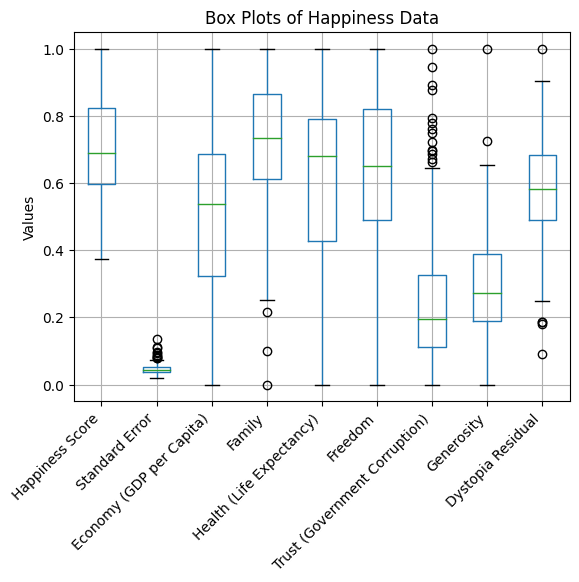

In [40]:
# Data distribution and Outliers

boxplot = data.boxplot(column=['Happiness Score', 'Standard Error',
                               'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                               'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])

boxplot.set_xticklabels(['Happiness Score', 'Standard Error',
                         'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                         'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
                        rotation=45, ha="right")

plt.title('Box Plots of Happiness Data')
plt.ylabel('Values')
plt.show()

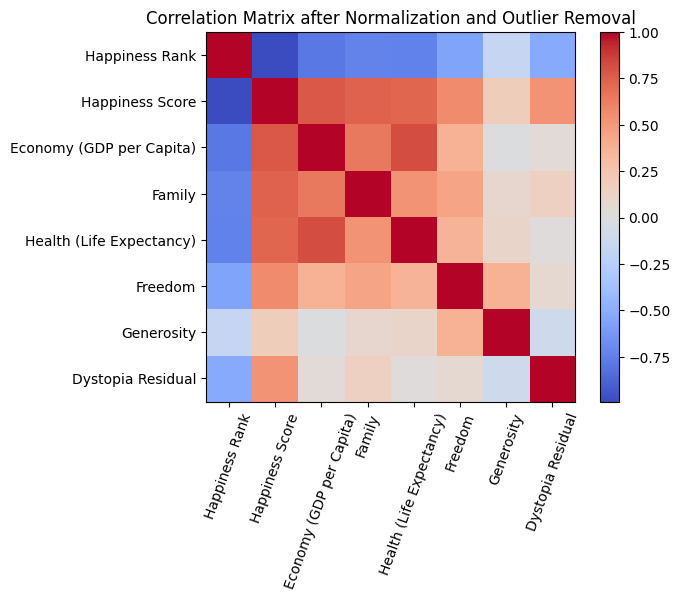

In [71]:
corr_matrix = data.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation = 70)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix after Normalization and Outlier Removal')
plt.show()

In [50]:
from scipy import stats
data.drop(["Country", 'Region', 'Standard Error', 'Trust (Government Corruption)'], axis=1)
family = data['Family']
family = family[(np.abs(stats.zscore(family)) < 3).all(axis =1)]
data["Family"] = family

ValueError: ignored

In [52]:
data = data.drop(["Country", 'Region', 'Standard Error', 'Trust (Government Corruption)'], axis=1)
data.head(10)

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,1,1.000000,0.826132,0.962403,0.918244,0.993789,0.372895,0.698857
1,2,0.996573,0.770412,1.000000,0.924496,0.938841,0.548198,0.750112
2,3,0.992092,0.784113,0.970297,0.853099,0.969615,0.428947,0.691822
3,4,0.991433,0.863099,0.949167,0.863409,1.000000,0.435983,0.684401
4,5,0.978911,0.784592,0.943219,0.883326,0.945112,0.575602,0.680640
5,6,0.976143,0.763272,0.940117,0.867213,0.958132,0.293399,0.727220
6,7,0.972453,0.786455,0.912953,0.870851,0.919415,0.598206,0.684510
7,8,0.970608,0.787798,0.919300,0.888437,0.985173,0.455621,0.658273
8,9,0.960327,0.739568,0.941122,0.885999,0.954683,0.596836,0.628585
9,10,0.960063,0.788905,0.933677,0.908617,0.972392,0.547344,0.629198


In [63]:
normalized_data = data[np.abs(stats.zscore(data['Generosity'])) < 3]

In [65]:
normalized_data = data[~((data-data.mean()).abs() > 3*data.std())]

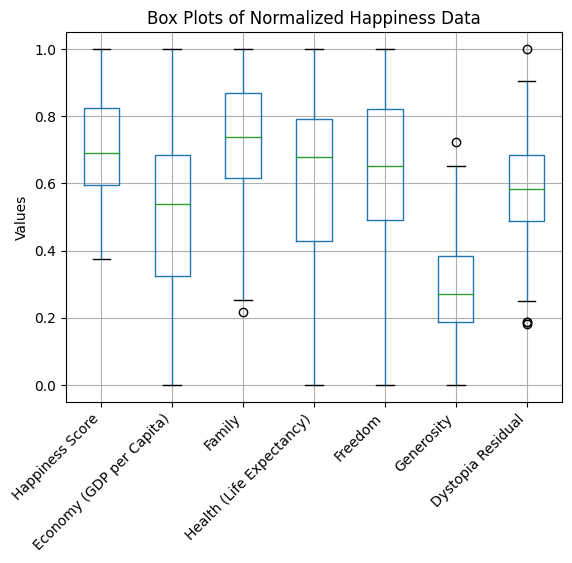

In [66]:
# Data distribution and Outliers

boxplot = normalized_data.boxplot(column=['Happiness Score',
                               'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                               'Freedom', 'Generosity', 'Dystopia Residual'])

boxplot.set_xticklabels(['Happiness Score',
                         'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                         'Freedom', 'Generosity', 'Dystopia Residual'],
                        rotation=45, ha="right")

plt.title('Box Plots of Normalized Happiness Data')
plt.ylabel('Values')
plt.show()

In [46]:
len(family)

156

In [47]:
data.shape

(158, 12)

In [42]:
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,1.000000,0.03411,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.698857
1,Iceland,Western Europe,2,0.996573,0.04884,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.750112
2,Denmark,Western Europe,3,0.992092,0.03328,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.691822
3,Norway,Western Europe,4,0.991433,0.03880,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.684401
4,Canada,North America,5,0.978911,0.03553,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.680640
5,Finland,Western Europe,6,0.976143,0.03140,0.763272,0.940117,0.867213,0.958132,0.749615,0.293399,0.727220
6,Netherlands,Western Europe,7,0.972453,0.02799,0.786455,0.912953,0.870851,0.919415,0.576435,0.598206,0.684510
7,Sweden,Western Europe,8,0.970608,0.03157,0.787798,0.919300,0.888437,0.985173,0.794405,0.455621,0.658273
8,New Zealand,Australia and New Zealand,9,0.960327,0.03371,0.739568,0.941122,0.885999,0.954683,0.777699,0.596836,0.628585
9,Australia,Australia and New Zealand,10,0.960063,0.04083,0.788905,0.933677,0.908617,0.972392,0.645703,0.547344,0.629198


In [ ]:
# 1. How does the Happiness Score vary across different regions?
data.groupby('Region')['Happiness Score'].mean().plot(kind='pie')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score by Region')
plt.show()

TypeError: ignored

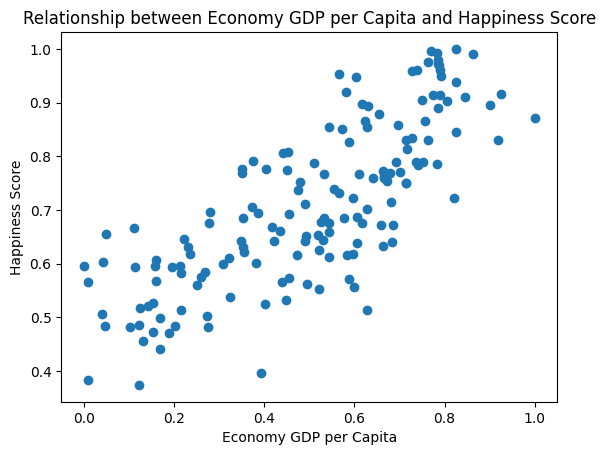

In [ ]:
# 2. What is the relationship between Economy GDP per Capita and Happiness Score?
plt.scatter(data['Economy (GDP per Capita)'], data['Happiness Score'])
plt.xlabel('Economy GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Relationship between Economy GDP per Capita and Happiness Score')
plt.show()

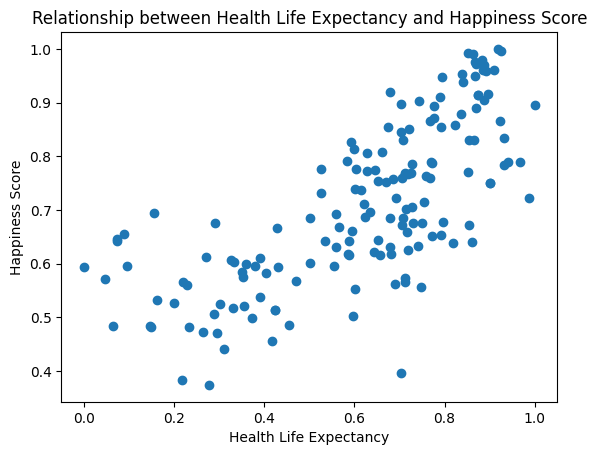

In [ ]:
# 3. Is there a correlation between Health Life Expectancy and Happiness Score?
plt.scatter(data['Health (Life Expectancy)'], data['Happiness Score'])
plt.xlabel('Health Life Expectancy')
plt.ylabel('Happiness Score')
plt.title('Relationship between Health Life Expectancy and Happiness Score')
plt.show()

In [ ]:
# 4. Countries with highest and lowest happiness score
highest_happiness = data.loc[data['Happiness Score'].idxmax()]
lowest_happiness = data.loc[data['Happiness Score'].idxmin()]
print(f"Highest Happiness Score: {highest_happiness['Country']} : {highest_happiness['Happiness Score']}")
print(f"Lowest Happiness Score: {lowest_happiness['Country']} : {lowest_happiness['Happiness Score']}")

Highest Happiness Score: Switzerland : 1.0
Lowest Happiness Score: Togo : 0.37419269803611444


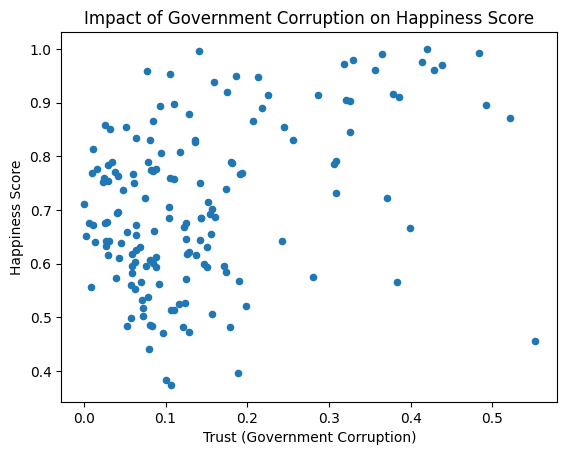

In [ ]:
# 5. Does the level of Government Corruption (Trust) impact the Happiness Score?
data.plot(x='Trust (Government Corruption)', y='Happiness Score', kind='scatter')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.title('Impact of Government Corruption on Happiness Score')
plt.show()

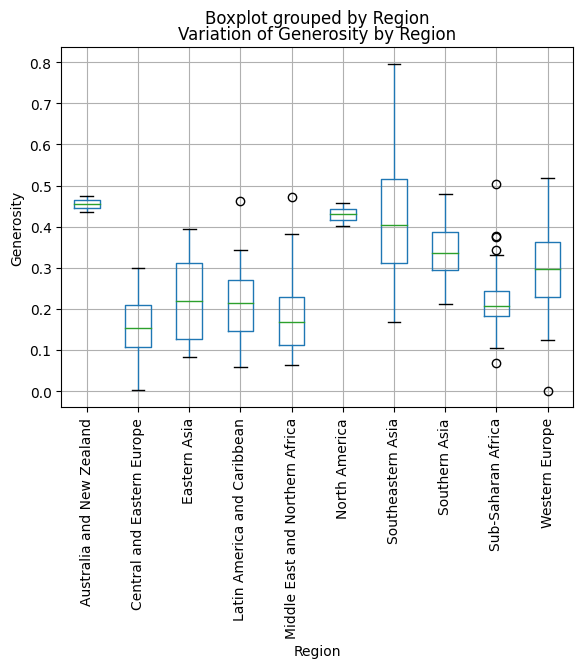

In [ ]:
# 6. How does the level of Generosity vary across different regions?
data.boxplot(column='Generosity', by='Region')
plt.xlabel('Region')
plt.ylabel('Generosity')
plt.title('Variation of Generosity by Region')
plt.xticks(rotation = 90)
plt.show()

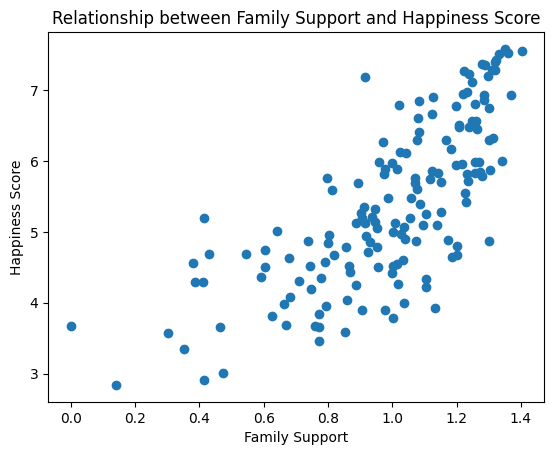

In [ ]:
# 7. Is there a relationship between Family support and Happiness Score?
plt.scatter(data['Family'], data['Happiness Score'])
plt.xlabel('Family Support')
plt.ylabel('Happiness Score')
plt.title('Relationship between Family Support and Happiness Score')
plt.show()

<AxesSubplot: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

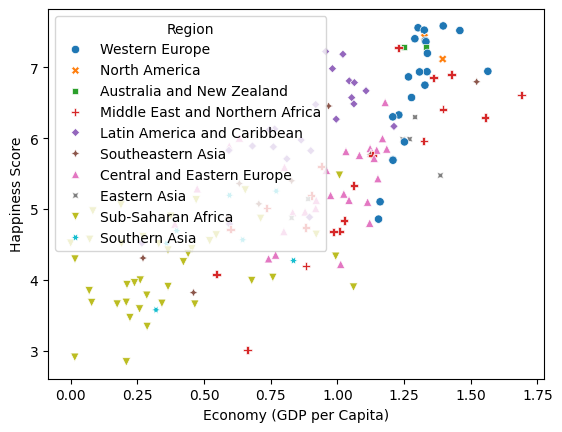

In [ ]:
import seaborn as sns
sns.scatterplot(data=data, x=data['Economy (GDP per Capita)'], y=data['Happiness Score'],hue="Region",style="Region")

A Title for the charts below

<AxesSubplot: ylabel='Family'>

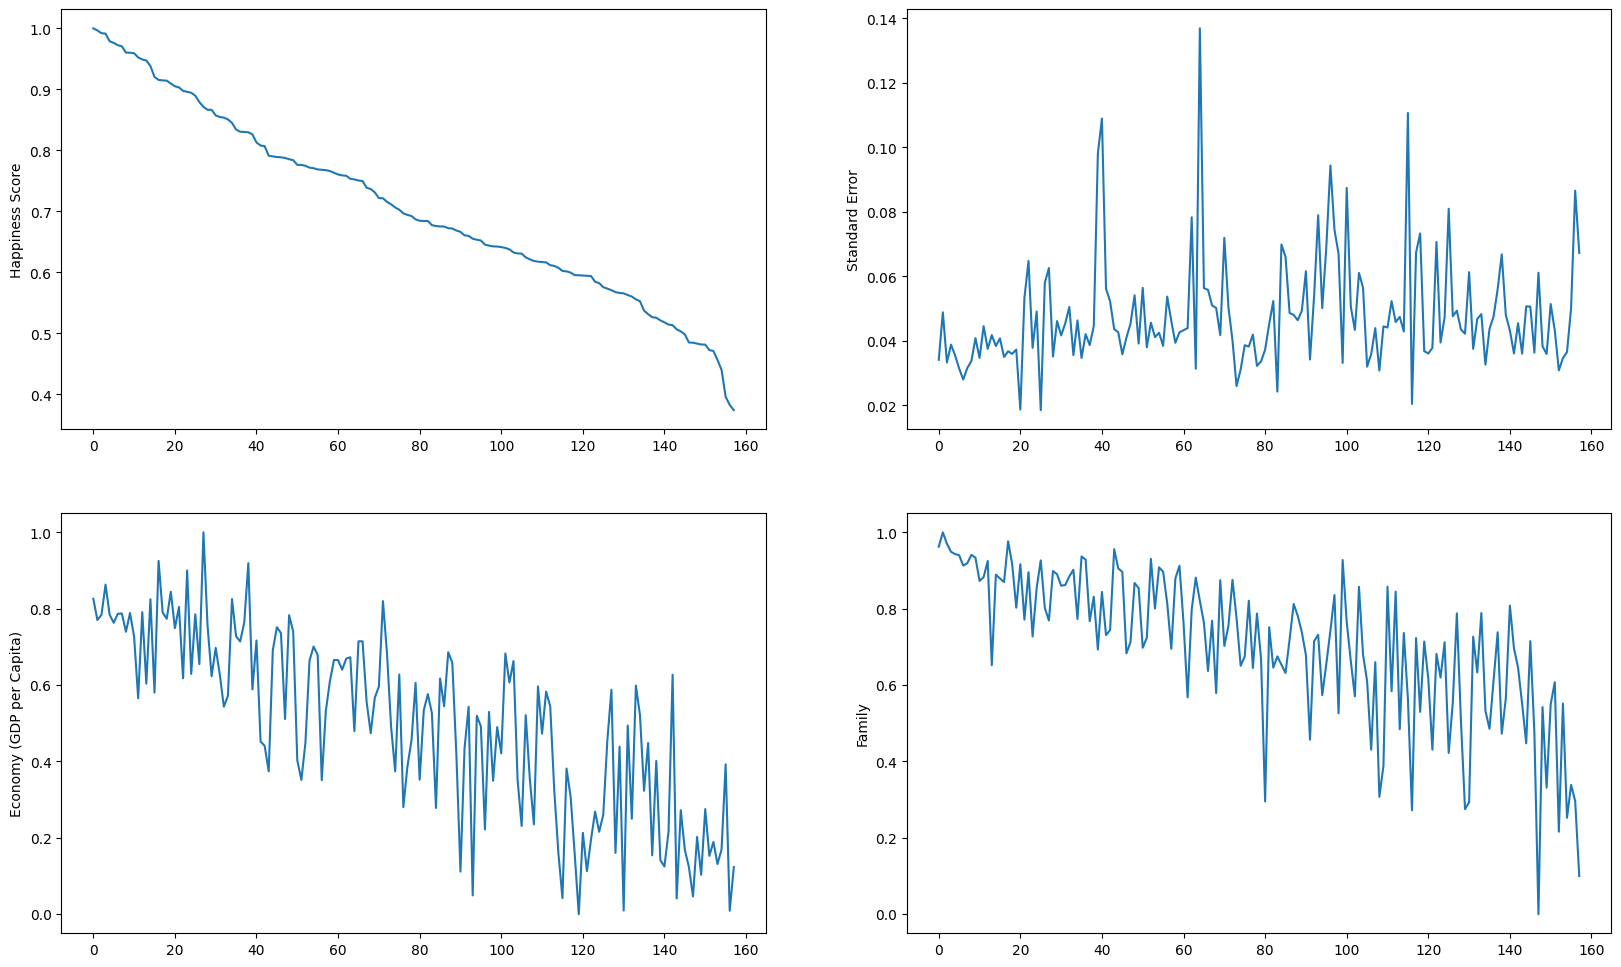

In [ ]:

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.lineplot(data['Happiness Score'])
plt.subplot(2,2,2)
sns.lineplot(data['Standard Error'])
plt.subplot(2,2,3)
sns.lineplot(data['Economy (GDP per Capita)'])
plt.subplot(2,2,4)
sns.lineplot(data['Family'])

<AxesSubplot: ylabel='Generosity'>

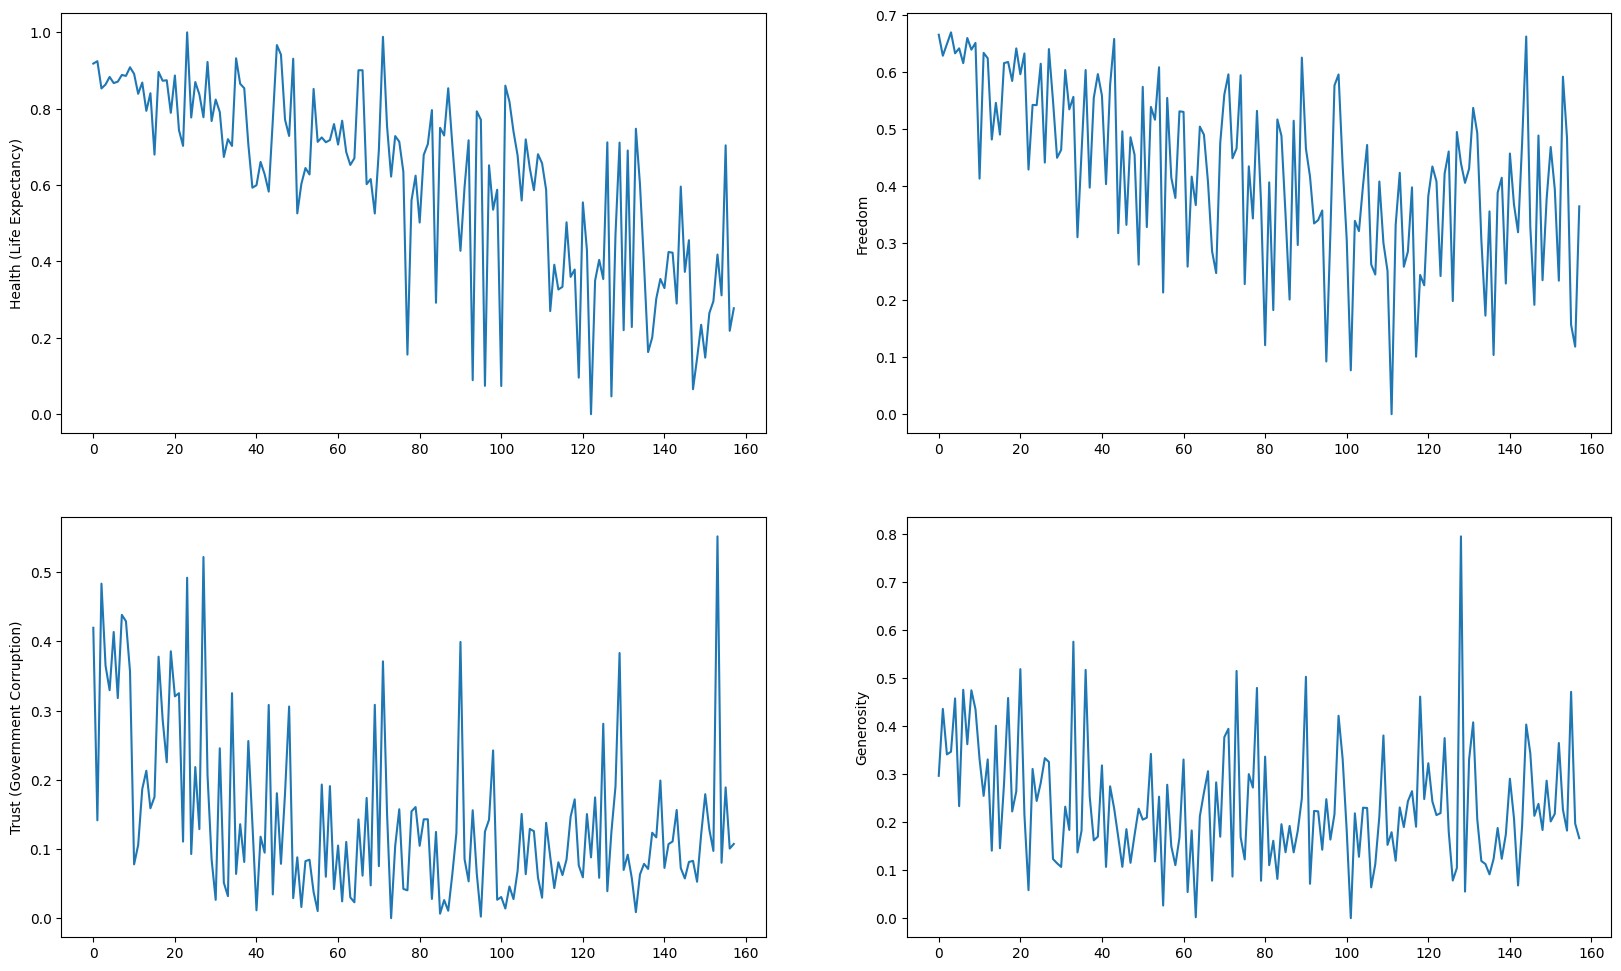

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.lineplot(data['Health (Life Expectancy)'])
plt.subplot(2,2,2)
sns.lineplot(data['Freedom'])
plt.subplot(2,2,3)
sns.lineplot(data['Trust (Government Corruption)'])
plt.subplot(2,2,4)
sns.lineplot(data['Generosity'])

<AxesSubplot: ylabel='Happiness Rank'>

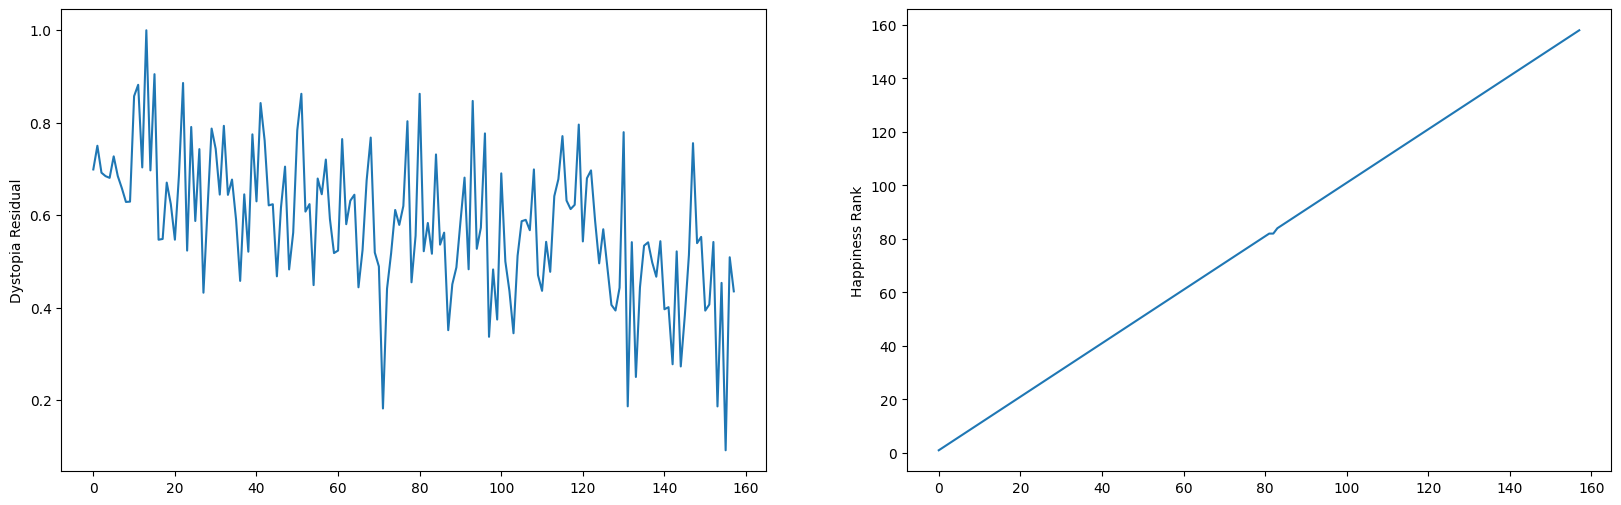

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.lineplot(data['Dystopia Residual'])
plt.subplot(1,2,2)
sns.lineplot(data['Happiness Rank'])